![](https://github.com/kalelmartinho/7daysOfCode/blob/master/7daysOfCode.png?raw=true)

---

Por *Kalel Leonardo Martinho*

# #7DaysOfCode - 6: Split Testing 📊🅰️🅱️

Executar um teste de hipótese no [DataSet disponibilizado](https://www.kaggle.com/datasets/zhangluyuan/ab-testing) para validar se a versão nova do site (com o sistema de recomendação) é melhor que a antiga.

---


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

df = pd.read_csv('ab_data.zip', compression = 'zip')

sns.set_theme(context='notebook', style="darkgrid", palette='deep', font_scale=1, color_codes=True, rc=None)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [3]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [4]:
df.user_id.value_counts()


805339    2
754884    2
722274    2
783176    2
898232    2
         ..
642985    1
771499    1
923606    1
712675    1
715931    1
Name: user_id, Length: 290584, dtype: int64

Precisamos excluir os duplicados

In [5]:
df.drop_duplicates(subset='user_id', keep='first', inplace=True)

In [6]:
df.groupby(['group']).converted.mean()*100.00

group
control      12.029718
treatment    11.884253
Name: converted, dtype: float64

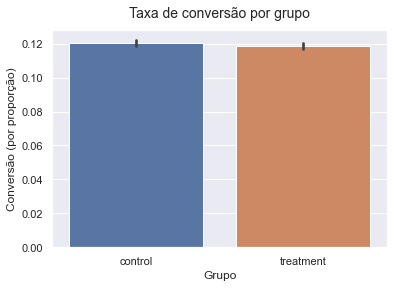

In [7]:
ax = sns.barplot(x = 'group',y ='converted',data = df, orient = 'v')
plt.title('Taxa de conversão por grupo', pad=12, fontsize=14)
ax.set(ylabel = 'Conversão (por proporção)', xlabel = 'Grupo')
plt.show()

In [8]:
controle = df[df.group == 'control'].converted
tratamento = df[df.group == 'treatment'].converted

In [9]:
nobs = [controle.count(), tratamento.count()]
successes = [tratamento.sum(), controle.sum()]

z_stat, pval = proportions_ztest(
    successes, nobs=nobs
)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'Taxa de conversão para o grupo de controle: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'Taxa de conversão para o grupo de tratamento: [{lower_treat:.3f}, {upper_treat:.3f}]')

Taxa de conversão para o grupo de controle: [0.117, 0.121]
Taxa de conversão para o grupo de tratamento: [0.119, 0.122]


### Não há evidências suficientes para dizer que a taxa de conversão teve mudanças significativas. Concluímos que não faz sentido substituir a versão atual.